In [3]:
import pandas as pd
import numpy as np
import os
from datetime import datetime

In [6]:
dirname = 'C:/Users/Big data/Desktop/Tibame_tool_Data'

f_sum = os.path.join(dirname,'summary.xlsx')

In [8]:
TS = pd.read_excel(f_sum)

In [9]:
TS.head()

,CSDP,PNO,CDATE,ITEM,SEQNO,SNO2,SCRN,BDATE,EDATE,ORDERDR,...,AMOUNT,NHI_COST,IO,DEPT,PRICE,UTIME,ITEM_CNT,SEX,AGE,Tool ID
0,1580,6091618,2017-10-02,79994,1060350713,1,2018/10/19 ¤U¤È 02:19:25,2017/10/2 ¤W¤È 10:51:00,2017/10/2 ¤W¤È 11:45:27,4009,...,3800.0,NaN,O,15,NaN,2018/10/19 ¤U¤È 02:19:25,1,F,66,B099180
1,1580,43195975,2017-10-02,70008,1060351112,1,2018/10/19 ¤U¤È 02:19:25,2017/10/2 ¤U¤È 01:46:00,2017/10/2 ¤U¤È 02:02:14,4017,...,21000.0,NaN,O,14,NaN,2018/10/19 ¤U¤È 02:19:25,1,M,45,B099180
2,1580,33022525,2017-10-02,70022,1060350388,1,2018/10/19 ¤U¤È 02:19:25,2017/10/2 ¤W¤È 08:42:00,2017/10/2 ¤W¤È 09:21:42,176,...,3850.0,NaN,O,76,NaN,2018/10/19 ¤U¤È 02:19:25,1,F,44,B099180
3,1580,16868831,2017-10-02,79994,1060350883,1,2018/10/19 ¤U¤È 02:19:24,2017/10/2 ¤W¤È 11:52:00,2017/10/2 ¤U¤È 12:28:10,4909,...,3800.0,NaN,O,68,NaN,2018/10/19 ¤U¤È 02:19:24,1,F,64,B099180
4,1580,17711213,2017-10-02,79994,1060350644,1,2018/10/19 ¤U¤È 02:19:27,2017/10/2 ¤W¤È 10:25:00,2017/10/2 ¤W¤È 10:54:27,4909,...,3800.0,NaN,O,68,NaN,2018/10/19 ¤U¤È 02:19:27,1,M,74,B099180


In [10]:
TS.shape

(86238, 27)

In [11]:
f_Dr = os.path.join(dirname,'Doctor_merge_ORDERDR_Department')

In [12]:
DR = pd.read_csv(f_Dr)

In [36]:
DR.head()

,Dr_Name,ORDERDR,Remarked,Department
0,李淳權,5957,NaN,內分泌暨新陳代謝科(12)
1,廖偉丞,5147,NaN,內分泌暨新陳代謝科(12)
2,梁清香,5969,NaN,內分泌暨新陳代謝科(12)
3,簡銘男,5951,NaN,內分泌暨新陳代謝科(12)
4,莊世旻,6472,NaN,內分泌暨新陳代謝科(12)


In [37]:
DR.shape

(783, 4)

In [35]:
DR['ORDERDR'] = DR['ORDERDR'].fillna('1234')

In [48]:
DR['ORDERDR']=DR['ORDERDR'].str.replace('531健','531')

In [38]:
DR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 4 columns):
Dr_Name       783 non-null object
ORDERDR       783 non-null object
Remarked      171 non-null object
Department    782 non-null object
dtypes: object(4)
memory usage: 24.5+ KB


In [27]:
TS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86238 entries, 0 to 86237
Data columns (total 27 columns):
CSDP            86238 non-null int64
PNO             86238 non-null int64
CDATE           86238 non-null datetime64[ns]
ITEM            86238 non-null int64
SEQNO           86238 non-null int64
SNO2            86238 non-null int64
SCRN            86238 non-null object
BDATE           86238 non-null object
EDATE           86229 non-null object
ORDERDR         86238 non-null int64
MD_NO           86238 non-null int64
PP_NO           86238 non-null object
MODEL_NAME      86171 non-null object
STATION_NAME    86238 non-null object
PLACE           86238 non-null object
CASENO          86238 non-null int64
LINKNO          86238 non-null int64
AMOUNT          86015 non-null float64
NHI_COST        0 non-null float64
IO              86238 non-null object
DEPT            86238 non-null object
PRICE           0 non-null float64
UTIME           86238 non-null object
ITEM_CNT        86238 n

In [26]:
#TS的ORDERDR轉乘object
TS['ORDERDR'] = TS['ORDERDR'].astype(np.int64)

In [49]:
DR['ORDERDR'] = DR['ORDERDR'].astype(np.int64)

In [53]:
#把多餘的(多出來的ORDERDR)往下延展新增
t1 = pd.merge(TS,DR,on ='ORDERDR' ,how = 'outer')

In [58]:
print(t1.shape)
print(t1.head())
t1.tail()

(87702, 30)
     CSDP         PNO      CDATE     ITEM         SEQNO  SNO2  \
0  1580.0   6091618.0 2017-10-02  79994.0  1.060351e+09   1.0   
1  1580.0  21407836.0 2017-10-02  70022.0  1.060351e+09   1.0   
2  1580.0   1481312.0 2017-10-03  79994.0  1.060353e+09   1.0   
3  1580.0  51572997.0 2017-10-03  79994.0  1.060352e+09   1.0   
4  1580.0  46038878.0 2017-10-05  79994.0  1.060355e+09   1.0   

                       SCRN                    BDATE                    EDATE  \
0  2018/10/19 ¤U¤È 02:19:25  2017/10/2 ¤W¤È 10:51:00  2017/10/2 ¤W¤È 11:45:27   
1  2018/10/19 ¤U¤È 02:19:33  2017/10/2 ¤U¤È 03:10:00  2017/10/2 ¤U¤È 03:26:44   
2  2018/10/19 ¤U¤È 02:19:25  2017/10/3 ¤U¤È 01:03:00  2017/10/3 ¤U¤È 01:11:37   
3  2018/10/19 ¤U¤È 02:19:24  2017/10/3 ¤W¤È 10:04:00  2017/10/3 ¤W¤È 10:54:34   
4  2018/10/19 ¤U¤È 02:19:33  2017/10/5 ¤U¤È 01:30:00  2017/10/5 ¤U¤È 02:03:01   

   ORDERDR  ...  DEPT PRICE                     UTIME ITEM_CNT SEX   AGE  \
0     4009  ...    15   NaN  2018/

,CSDP,PNO,CDATE,ITEM,SEQNO,SNO2,SCRN,BDATE,EDATE,ORDERDR,...,DEPT,PRICE,UTIME,ITEM_CNT,SEX,AGE,Tool ID,Dr_Name,Remarked,Department
87697,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,5997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,蔡思盈,NaN,骨質疏鬆暨瘦身保健門診(29)
87698,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,5765,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,張祐瀚,NaN,骨質疏鬆暨瘦身保健門診(29)
87699,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,5775,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,蔡蕙如,NaN,骨質疏鬆暨瘦身保健門診(29)
87700,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,5769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,馬筱淇,NaN,骨質疏鬆暨瘦身保健門診(29)
87701,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,5762,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,蕭宇軒,NaN,骨質疏鬆暨瘦身保健門診(29)


In [59]:
#把多餘的(多出來的ORDERDR)除掉
t2 = pd.merge(TS,DR,on ='ORDERDR' ,how = 'inner')

In [60]:
print(t2.shape)
print(t2.head())
t2.tail()

(81089, 30)
   CSDP       PNO      CDATE   ITEM       SEQNO  SNO2  \
0  1580   6091618 2017-10-02  79994  1060350713     1   
1  1580  21407836 2017-10-02  70022  1060351352     1   
2  1580   1481312 2017-10-03  79994  1060352690     1   
3  1580  51572997 2017-10-03  79994  1060352292     1   
4  1580  46038878 2017-10-05  79994  1060354715     1   

                       SCRN                    BDATE                    EDATE  \
0  2018/10/19 ¤U¤È 02:19:25  2017/10/2 ¤W¤È 10:51:00  2017/10/2 ¤W¤È 11:45:27   
1  2018/10/19 ¤U¤È 02:19:33  2017/10/2 ¤U¤È 03:10:00  2017/10/2 ¤U¤È 03:26:44   
2  2018/10/19 ¤U¤È 02:19:25  2017/10/3 ¤U¤È 01:03:00  2017/10/3 ¤U¤È 01:11:37   
3  2018/10/19 ¤U¤È 02:19:24  2017/10/3 ¤W¤È 10:04:00  2017/10/3 ¤W¤È 10:54:34   
4  2018/10/19 ¤U¤È 02:19:33  2017/10/5 ¤U¤È 01:30:00  2017/10/5 ¤U¤È 02:03:01   

   ORDERDR  ...  DEPT PRICE                     UTIME ITEM_CNT SEX  AGE  \
0     4009  ...    15   NaN  2018/10/19 ¤U¤È 02:19:25        1   F   66   
1     40

,CSDP,PNO,CDATE,ITEM,SEQNO,SNO2,SCRN,BDATE,EDATE,ORDERDR,...,DEPT,PRICE,UTIME,ITEM_CNT,SEX,AGE,Tool ID,Dr_Name,Remarked,Department
81084,3580,15096393,2018-04-17,79994,2070077489,1,2018/10/19 ¤U¤È 03:23:35,2018/4/17 ¤W¤È 08:58:00,2018/4/17 ¤W¤È 09:44:17,5417,...,73,NaN,2018/10/19 ¤U¤È 03:23:35,1,M,45,B104374,胡國琦,NaN,復健科(73)
81085,3580,10281759,2018-05-25,79994,2070106031,1,2018/10/19 ¤U¤È 03:32:50,2018/5/25 ¤W¤È 09:18:00,2018/5/25 ¤W¤È 10:19:06,5417,...,73,NaN,2018/10/19 ¤U¤È 03:32:50,1,F,76,B104374,胡國琦,NaN,復健科(73)
81086,3580,52324695,2018-06-04,79993,2070113273,1,2018/10/19 ¤U¤È 03:42:06,2018/6/4 ¤U¤È 07:22:00,2018/6/4 ¤U¤È 08:01:10,5417,...,73,NaN,2018/10/19 ¤U¤È 03:42:06,1,M,78,B104374,胡國琦,NaN,復健科(73)
81087,3580,28297687,2019-02-25,79993,2080036295,1,2019/3/5 ¤W¤È 05:23:49,2019/2/25 ¤W¤È 11:02:00,2019/2/25 ¤W¤È 11:40:16,5702,...,74,NaN,2019/3/5 ¤W¤È 05:23:49,1,M,57,B104374,黃煜旻,NaN,放射腫瘤科(74)
81088,3580,11669834,2019-03-19,79994,2080052945,1,2019/4/5 ¤W¤È 07:23:18,2019/3/19 ¤U¤È 02:10:00,2019/3/19 ¤U¤È 03:40:52,2657,...,21,NaN,2019/4/5 ¤W¤È 07:23:18,1,M,86,B104374,陳紹基,NaN,身心科(21)


In [66]:
f_list = os.path.join(dirname,'Item_ListName')
IM = pd.read_csv(f_list)
IM.head()

,ITEM,List_Name,Cost_Self
0,11001,FIRSTRGST初診掛號手續費,150.0
1,11002,REGISTERFEE複診掛號手續費,100.0
2,11003,EMGRGST急診初診掛號手續費,250.0
3,11004,EMGRGSTFEE急診複診掛號手續費,250.0
4,11007,精神科強制鑑定掛號費,100.0


In [68]:
IM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5663 entries, 0 to 5662
Data columns (total 3 columns):
ITEM         5663 non-null object
List_Name    5659 non-null object
Cost_Self    5650 non-null float64
dtypes: float64(1), object(2)
memory usage: 132.8+ KB


In [87]:
IM[IM['Cost_Self'].isnull()]

,ITEM,List_Name,Cost_Self
1034,41994,ENTLOCALTREATMENT-WOUNDTREATMENTANDCHANGEDRESS...,NaN
2149,ThoracoscopicEsophagomyotomy,NaN,NaN
2151,胸腔鏡食道肌肉切開術(註：Hellertype為限),NaN,NaN
2368,4375811,EXCISIONOFRETROPERITONEALMALIGNANTWITHRETROPER...,NaN
2483,4378039,CystoprostatectomywithoutPLNDwithouturethrecto...,NaN
2653,4380605B-1ENDTOENDANASTOMOSISUNILATERAL,11992,NaN
2658,4380607B-1輸卵管補植術Reimplantationwithmicroscopicu...,7590,NaN
3300,48818,SEMI-OPENEDORSEMI-CLOSEDMASKINHALATIONGENERALA...,NaN
3510,49322,SPECIALTREATMENTOFEXTRACTIONWOUND拔牙後特別處理 註：包括附...,NaN
3532,49356,SEQUESTRECTOMY:COMPLICATEDCASEMORETHAN1/3ARCH腐...,NaN


In [34]:
TS.head()

,CSDP,PNO,CDATE,ITEM,SEQNO,SNO2,SCRN,BDATE,EDATE,ORDERDR,...,AMOUNT,IO,DEPT,SEX,AGE,Tool ID,Time,Time_m,Time_s,AGE_CUT
0,1580,6091618,2017-10-02,79994,1060350713,1,2018/10/19 ¤U¤È 02:19:25,2017-10-02 10:51:00,2017-10-02 11:45:27,4009,...,3800.0,O,15,F,66,B099180,00:54:27,54.450000,3267.0,"(51.25, 76.875]"
1,1580,43195975,2017-10-02,70008,1060351112,1,2018/10/19 ¤U¤È 02:19:25,2017-10-02 13:46:00,2017-10-02 14:02:14,4017,...,21000.0,O,14,M,45,B099180,00:16:14,16.233333,974.0,"(25.625, 51.25]"
2,1580,33022525,2017-10-02,70022,1060350388,1,2018/10/19 ¤U¤È 02:19:25,2017-10-02 08:42:00,2017-10-02 09:21:42,176,...,3850.0,O,76,F,44,B099180,00:39:42,39.700000,2382.0,"(25.625, 51.25]"
3,1580,16868831,2017-10-02,79994,1060350883,1,2018/10/19 ¤U¤È 02:19:24,2017-10-02 11:52:00,2017-10-02 12:28:10,4909,...,3800.0,O,68,F,64,B099180,00:36:10,36.166667,2170.0,"(51.25, 76.875]"
4,1580,17711213,2017-10-02,79994,1060350644,1,2018/10/19 ¤U¤È 02:19:27,2017-10-02 10:25:00,2017-10-02 10:54:27,4909,...,3800.0,O,68,M,74,B099180,00:29:27,29.450000,1767.0,"(51.25, 76.875]"


In [6]:
TS.columns

Index(['CSDP', 'PNO', 'CDATE', 'ITEM', 'SEQNO', 'SNO2', 'SCRN', 'BDATE',
       'EDATE', 'ORDERDR', 'MD_NO', 'PP_NO', 'MODEL_NAME', 'STATION_NAME',
       'PLACE', 'CASENO', 'LINKNO', 'AMOUNT', 'NHI_COST', 'IO', 'DEPT',
       'PRICE', 'UTIME', 'ITEM_CNT', 'SEX', 'AGE', 'Tool ID'],
      dtype='object')

In [7]:
TS['BDATE'] = TS['BDATE'].str.replace('¤W¤È', 'AM')

In [8]:
TS['BDATE'] = TS['BDATE'].str.replace('¤U¤È','PM')

In [9]:
TS['BDATE'] = TS['BDATE'].str.replace('00:00:00','AM 12:00:00')

In [10]:
TS['BDATE'] = TS['BDATE'].str.replace('-','/')

In [11]:
TS['BDATE'] = pd.to_datetime(TS['BDATE'],format='%Y/%m/%d %p %I:%M:%S')


In [12]:
TS['EDATE'] = TS['EDATE'].str.replace('¤W¤È','AM')
TS['EDATE'] = TS['EDATE'].str.replace('¤U¤È','PM')

In [13]:
TS['EDATE'] = pd.to_datetime(TS['EDATE'],format='%Y/%m/%d %p %I:%M:%S')

In [14]:
TS['Time']=TS['EDATE']-TS['BDATE']

In [15]:
TS['Time_persecond'] = TS['Time'].dt.total_seconds()

In [32]:
'''TS = TS.drop(labels='Time_seconds',axis=1)'''

In [292]:
'''TS.describe()'''

'TS.describe()'

In [16]:
#留底
DF =TS

In [17]:
DF.head()

,CSDP,PNO,CDATE,ITEM,SEQNO,SNO2,SCRN,BDATE,EDATE,ORDERDR,...,IO,DEPT,PRICE,UTIME,ITEM_CNT,SEX,AGE,Tool ID,Time,Time_persecond
0,1580,6091618,2017-10-02,79994,1060350713,1,2018/10/19 ¤U¤È 02:19:25,2017-10-02 10:51:00,2017-10-02 11:45:27,4009,...,O,15,NaN,2018/10/19 ¤U¤È 02:19:25,1,F,66,B099180,00:54:27,3267.0
1,1580,43195975,2017-10-02,70008,1060351112,1,2018/10/19 ¤U¤È 02:19:25,2017-10-02 13:46:00,2017-10-02 14:02:14,4017,...,O,14,NaN,2018/10/19 ¤U¤È 02:19:25,1,M,45,B099180,00:16:14,974.0
2,1580,33022525,2017-10-02,70022,1060350388,1,2018/10/19 ¤U¤È 02:19:25,2017-10-02 08:42:00,2017-10-02 09:21:42,176,...,O,76,NaN,2018/10/19 ¤U¤È 02:19:25,1,F,44,B099180,00:39:42,2382.0
3,1580,16868831,2017-10-02,79994,1060350883,1,2018/10/19 ¤U¤È 02:19:24,2017-10-02 11:52:00,2017-10-02 12:28:10,4909,...,O,68,NaN,2018/10/19 ¤U¤È 02:19:24,1,F,64,B099180,00:36:10,2170.0
4,1580,17711213,2017-10-02,79994,1060350644,1,2018/10/19 ¤U¤È 02:19:27,2017-10-02 10:25:00,2017-10-02 10:54:27,4909,...,O,68,NaN,2018/10/19 ¤U¤È 02:19:27,1,M,74,B099180,00:29:27,1767.0


In [18]:
TS = TS.drop(labels='PRICE',axis=1)

In [19]:
TS = TS.drop(labels='NHI_COST',axis=1)

In [20]:
TS = TS.drop(labels='UTIME',axis=1)

In [21]:
TS = TS.drop(labels='ITEM_CNT',axis=1)

In [291]:
'''TS.info()'''

'TS.info()'

In [22]:
TS['Time_persecond'].mode()

0    1406.0
dtype: float64

In [23]:
TS['Time_persecond'].median()

1909.0000000000002

In [24]:
TS['Time_persecond'] = TS['Time_persecond'].fillna(1406)

In [26]:
TS['Time_m']=TS['Time_persecond']/60

In [28]:
TS['Time_s']=TS['Time_persecond']

In [29]:
TS = TS.drop(labels='Time_persecond',axis=1)

In [31]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [182]:
'''TS[TS['Time_persecond'] == TS['Time_persecond'].max()] = np.percentile(TS[~TS['Time_persecond'].isnull()]['Time_persecond'], q = 99)'''

"TS[TS['Time_persecond'] == TS['Time_persecond'].max()] = np.percentile(TS[~TS['Time_persecond'].isnull()]['Time_persecond'], q = 99)"

In [183]:
'''def reject_outliers(data):
    m = 2
    u = np.mean(data)
    s = np.std(data)
    filtered = [e for e in data if (u - 2 * s < e < u + 2 * s)]
    return filtered'''

'def reject_outliers(data):\n    m = 2\n    u = np.mean(data)\n    s = np.std(data)\n    filtered = [e for e in data if (u - 2 * s < e < u + 2 * s)]\n    return filtered'

In [177]:
'''TS['Time_test']=reject_outliers(TS['Time_m'])'''

"TS['Time_test']=reject_outliers(TS['Time_m'])"

In [33]:
TS['AGE_CUT']=pd.cut(TS['AGE'],8)

In [40]:
TS1=TS[TS['Time_m']<75]

In [46]:
TS1=TS

In [56]:
TS1=TS1[TS['AMOUNT']>0]

In [47]:
TS1.shape

(86238, 27)

In [52]:
TS1['AGE'].max()

205

In [53]:
TS1['AGE'].min()

0

In [54]:
TS1['AMOUNT'].max()

45059.0

In [55]:
TS1['AMOUNT'].min()

-4560.0

In [48]:
bins = [0,15,30,45,60,75,90,100]
TS1['AGE_CUT']=pd.cut(TS['AGE'],bins)

In [49]:
bins = [0,1000,5000,10000,50000]
TS1['AMOUNT_CUT']=pd.cut(TS1['AMOUNT'],bins)

In [58]:
TS1.shape

(85849, 28)

In [57]:
TS1.head()

,CSDP,PNO,CDATE,ITEM,SEQNO,SNO2,SCRN,BDATE,EDATE,ORDERDR,...,IO,DEPT,SEX,AGE,Tool ID,Time,Time_m,Time_s,AGE_CUT,AMOUNT_CUT
0,1580,6091618,2017-10-02,79994,1060350713,1,2018/10/19 ¤U¤È 02:19:25,2017-10-02 10:51:00,2017-10-02 11:45:27,4009,...,O,15,F,66,B099180,00:54:27,54.450000,3267.0,"(60, 75]","(1000, 5000]"
1,1580,43195975,2017-10-02,70008,1060351112,1,2018/10/19 ¤U¤È 02:19:25,2017-10-02 13:46:00,2017-10-02 14:02:14,4017,...,O,14,M,45,B099180,00:16:14,16.233333,974.0,"(30, 45]","(10000, 50000]"
2,1580,33022525,2017-10-02,70022,1060350388,1,2018/10/19 ¤U¤È 02:19:25,2017-10-02 08:42:00,2017-10-02 09:21:42,176,...,O,76,F,44,B099180,00:39:42,39.700000,2382.0,"(30, 45]","(1000, 5000]"
3,1580,16868831,2017-10-02,79994,1060350883,1,2018/10/19 ¤U¤È 02:19:24,2017-10-02 11:52:00,2017-10-02 12:28:10,4909,...,O,68,F,64,B099180,00:36:10,36.166667,2170.0,"(60, 75]","(1000, 5000]"
4,1580,17711213,2017-10-02,79994,1060350644,1,2018/10/19 ¤U¤È 02:19:27,2017-10-02 10:25:00,2017-10-02 10:54:27,4909,...,O,68,M,74,B099180,00:29:27,29.450000,1767.0,"(60, 75]","(1000, 5000]"


In [67]:
TS1.corr()

,CSDP,PNO,ITEM,SEQNO,ORDERDR,MD_NO,CASENO,LINKNO,AMOUNT,AGE,Time_m,Time_s
CSDP,1.000000,0.008893,-0.033425,0.999885,0.022297,-0.245759,0.267373,0.989480,0.064539,0.037831,-0.000162,-0.000162
PNO,0.008893,1.000000,0.003873,0.009033,0.004639,-0.007503,0.042776,0.010161,0.039252,-0.280568,-0.009188,-0.009188
ITEM,-0.033425,0.003873,1.000000,-0.032871,0.718459,0.364273,0.113123,-0.034177,-0.293010,0.096362,-0.011360,-0.011360
SEQNO,0.999885,0.009033,-0.032871,1.000000,0.023022,-0.245709,0.267143,0.989485,0.064303,0.037860,-0.000182,-0.000182
ORDERDR,0.022297,0.004639,0.718459,0.023022,1.000000,0.267662,0.156019,0.023410,-0.045764,0.085332,-0.009359,-0.009359
MD_NO,-0.245759,-0.007503,0.364273,-0.245709,0.267662,1.000000,-0.080183,-0.242841,-0.184471,0.018879,-0.008883,-0.008883
CASENO,0.267373,0.042776,0.113123,0.267143,0.156019,-0.080183,1.000000,0.268604,0.028721,0.063116,-0.008378,-0.008378
LINKNO,0.989480,0.010161,-0.034177,0.989485,0.023410,-0.242841,0.268604,1.000000,0.065598,0.039117,-0.000375,-0.000375
AMOUNT,0.064539,0.039252,-0.293010,0.064303,-0.045764,-0.184471,0.028721,0.065598,1.000000,-0.039885,0.009221,0.009221
AGE,0.037831,-0.280568,0.096362,0.037860,0.085332,0.018879,0.063116,0.039117,-0.039885,1.000000,0.001907,0.001907


In [60]:
TS1.columns

Index(['CSDP', 'PNO', 'CDATE', 'ITEM', 'SEQNO', 'SNO2', 'SCRN', 'BDATE',
       'EDATE', 'ORDERDR', 'MD_NO', 'PP_NO', 'MODEL_NAME', 'STATION_NAME',
       'PLACE', 'CASENO', 'LINKNO', 'AMOUNT', 'IO', 'DEPT', 'SEX', 'AGE',
       'Tool ID', 'Time', 'Time_m', 'Time_s', 'AGE_CUT', 'AMOUNT_CUT'],
      dtype='object')

In [69]:
TS1=TS1[TS1['Time_m']<75]

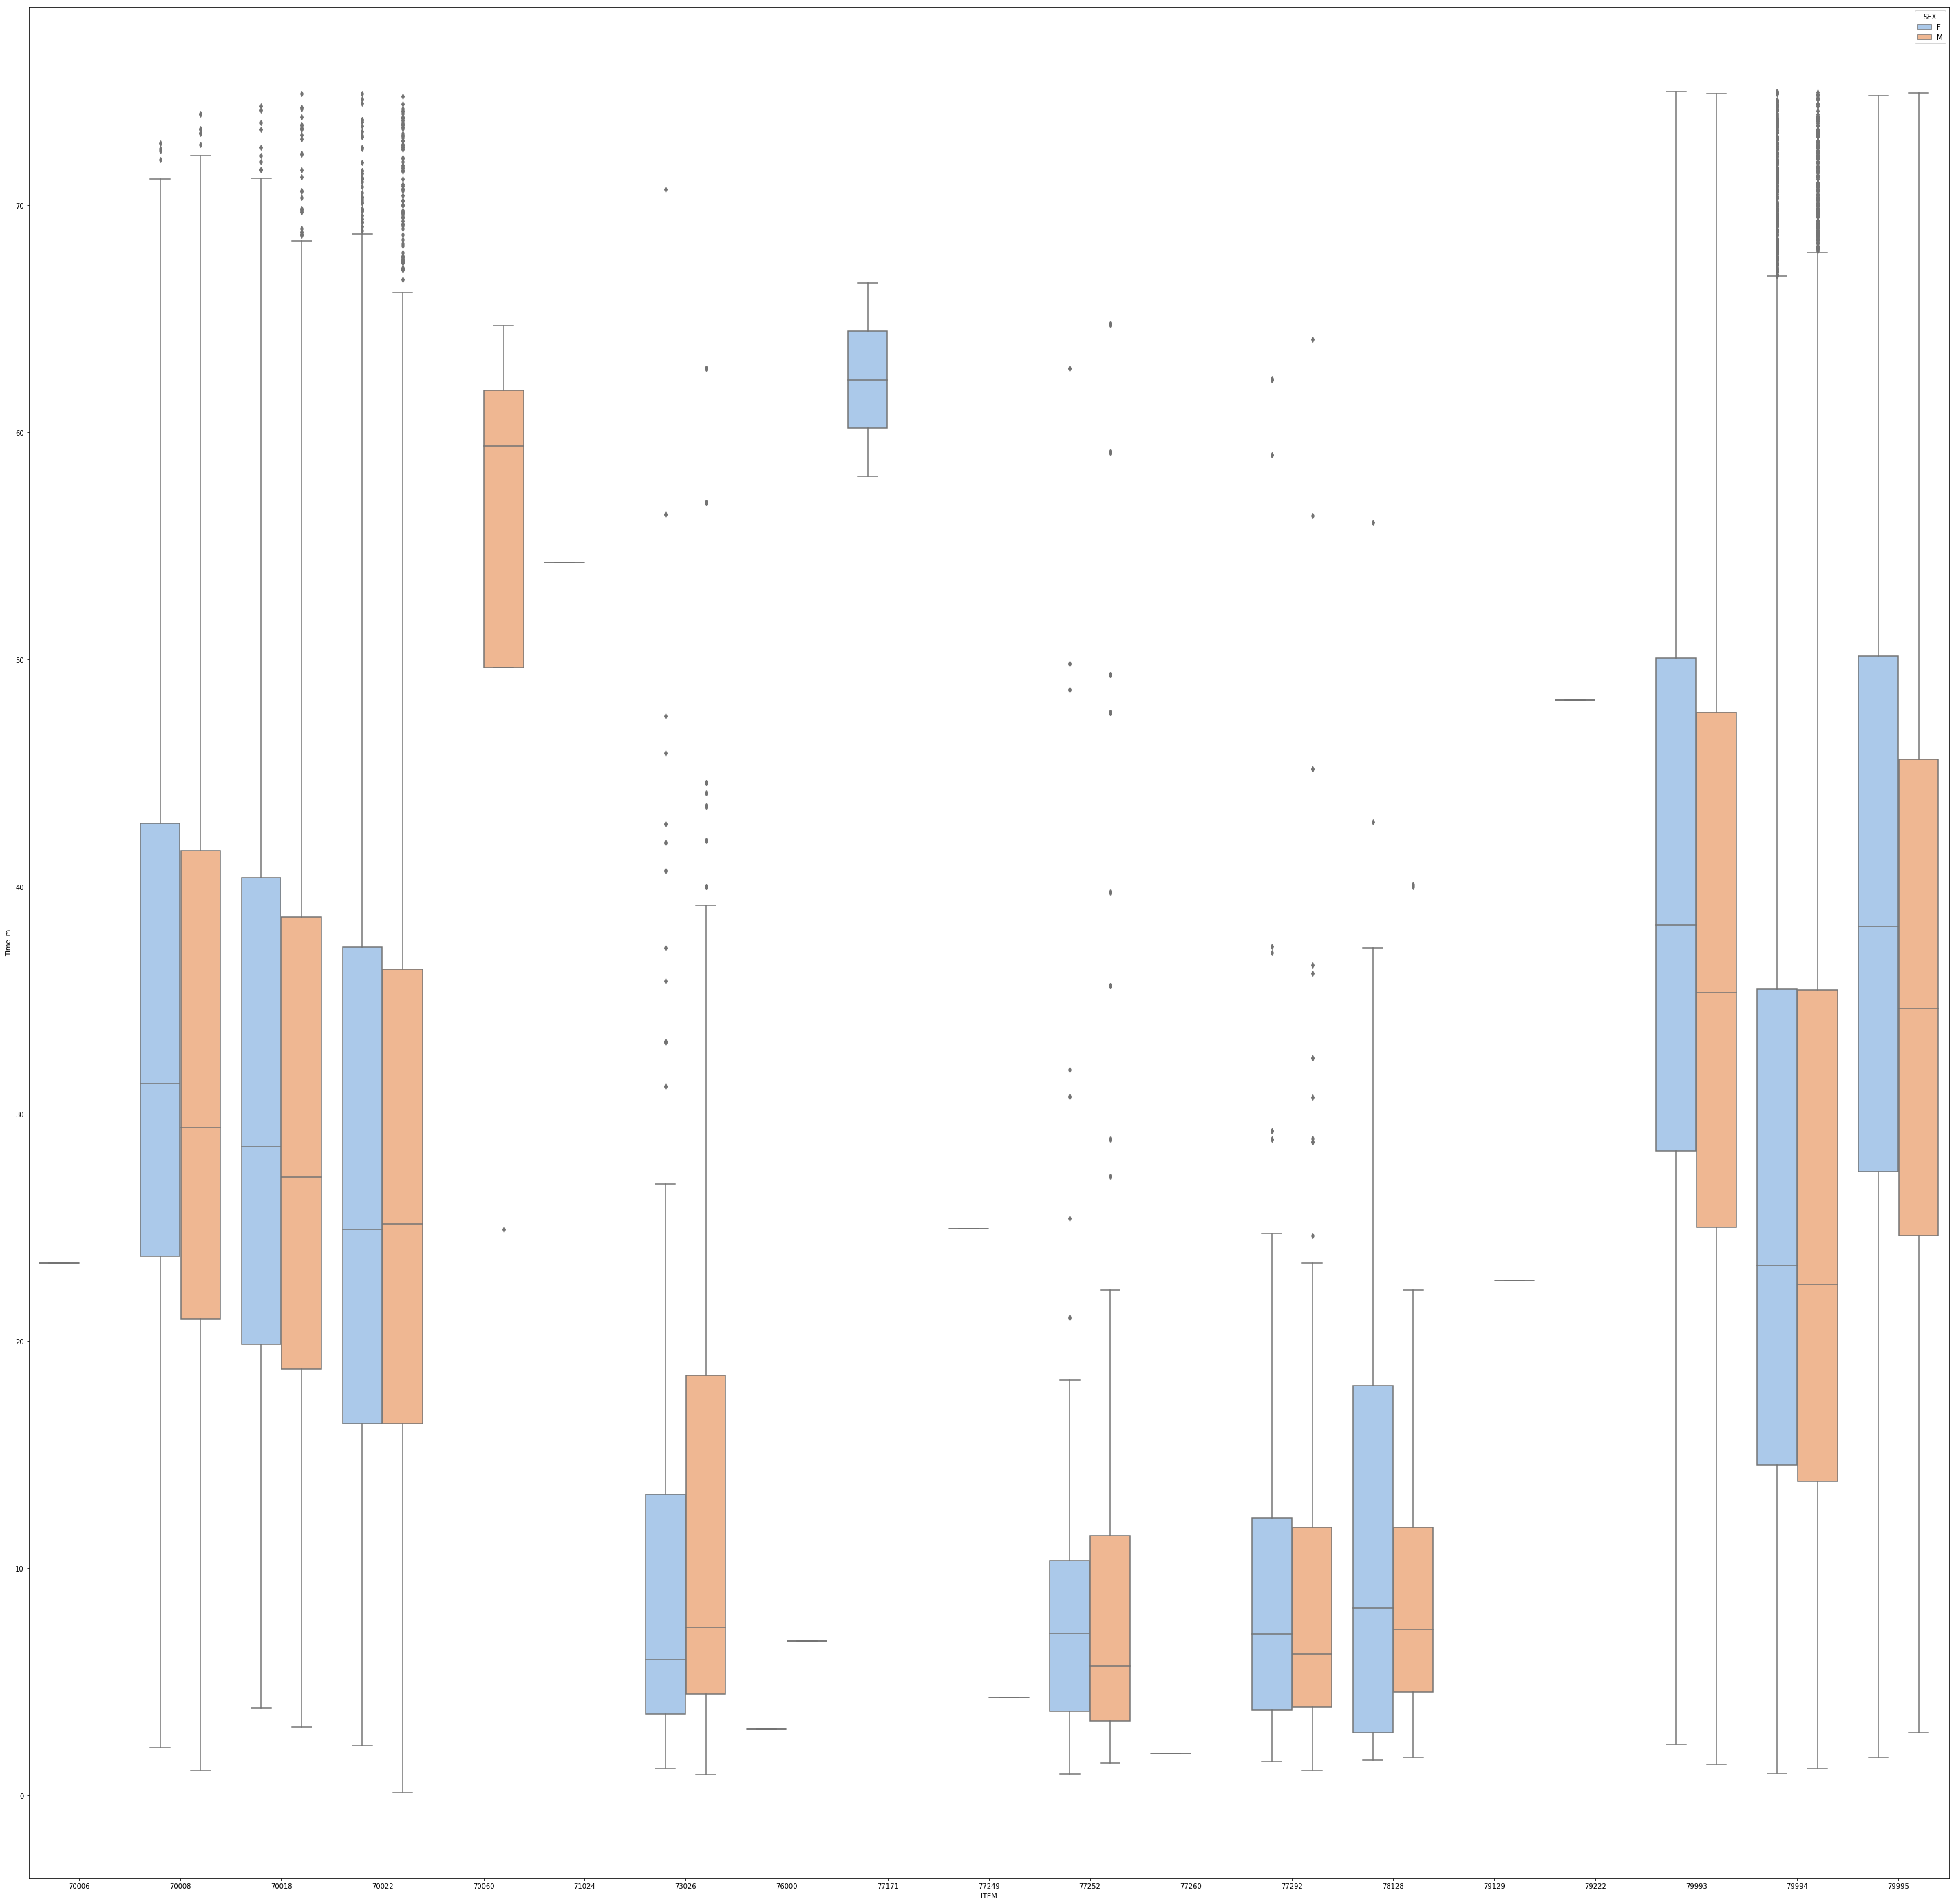

In [70]:
plt.figure(figsize=(50,50))
sns.boxplot(x="ITEM", y="Time_m",hue='SEX',data=TS1, palette="pastel")

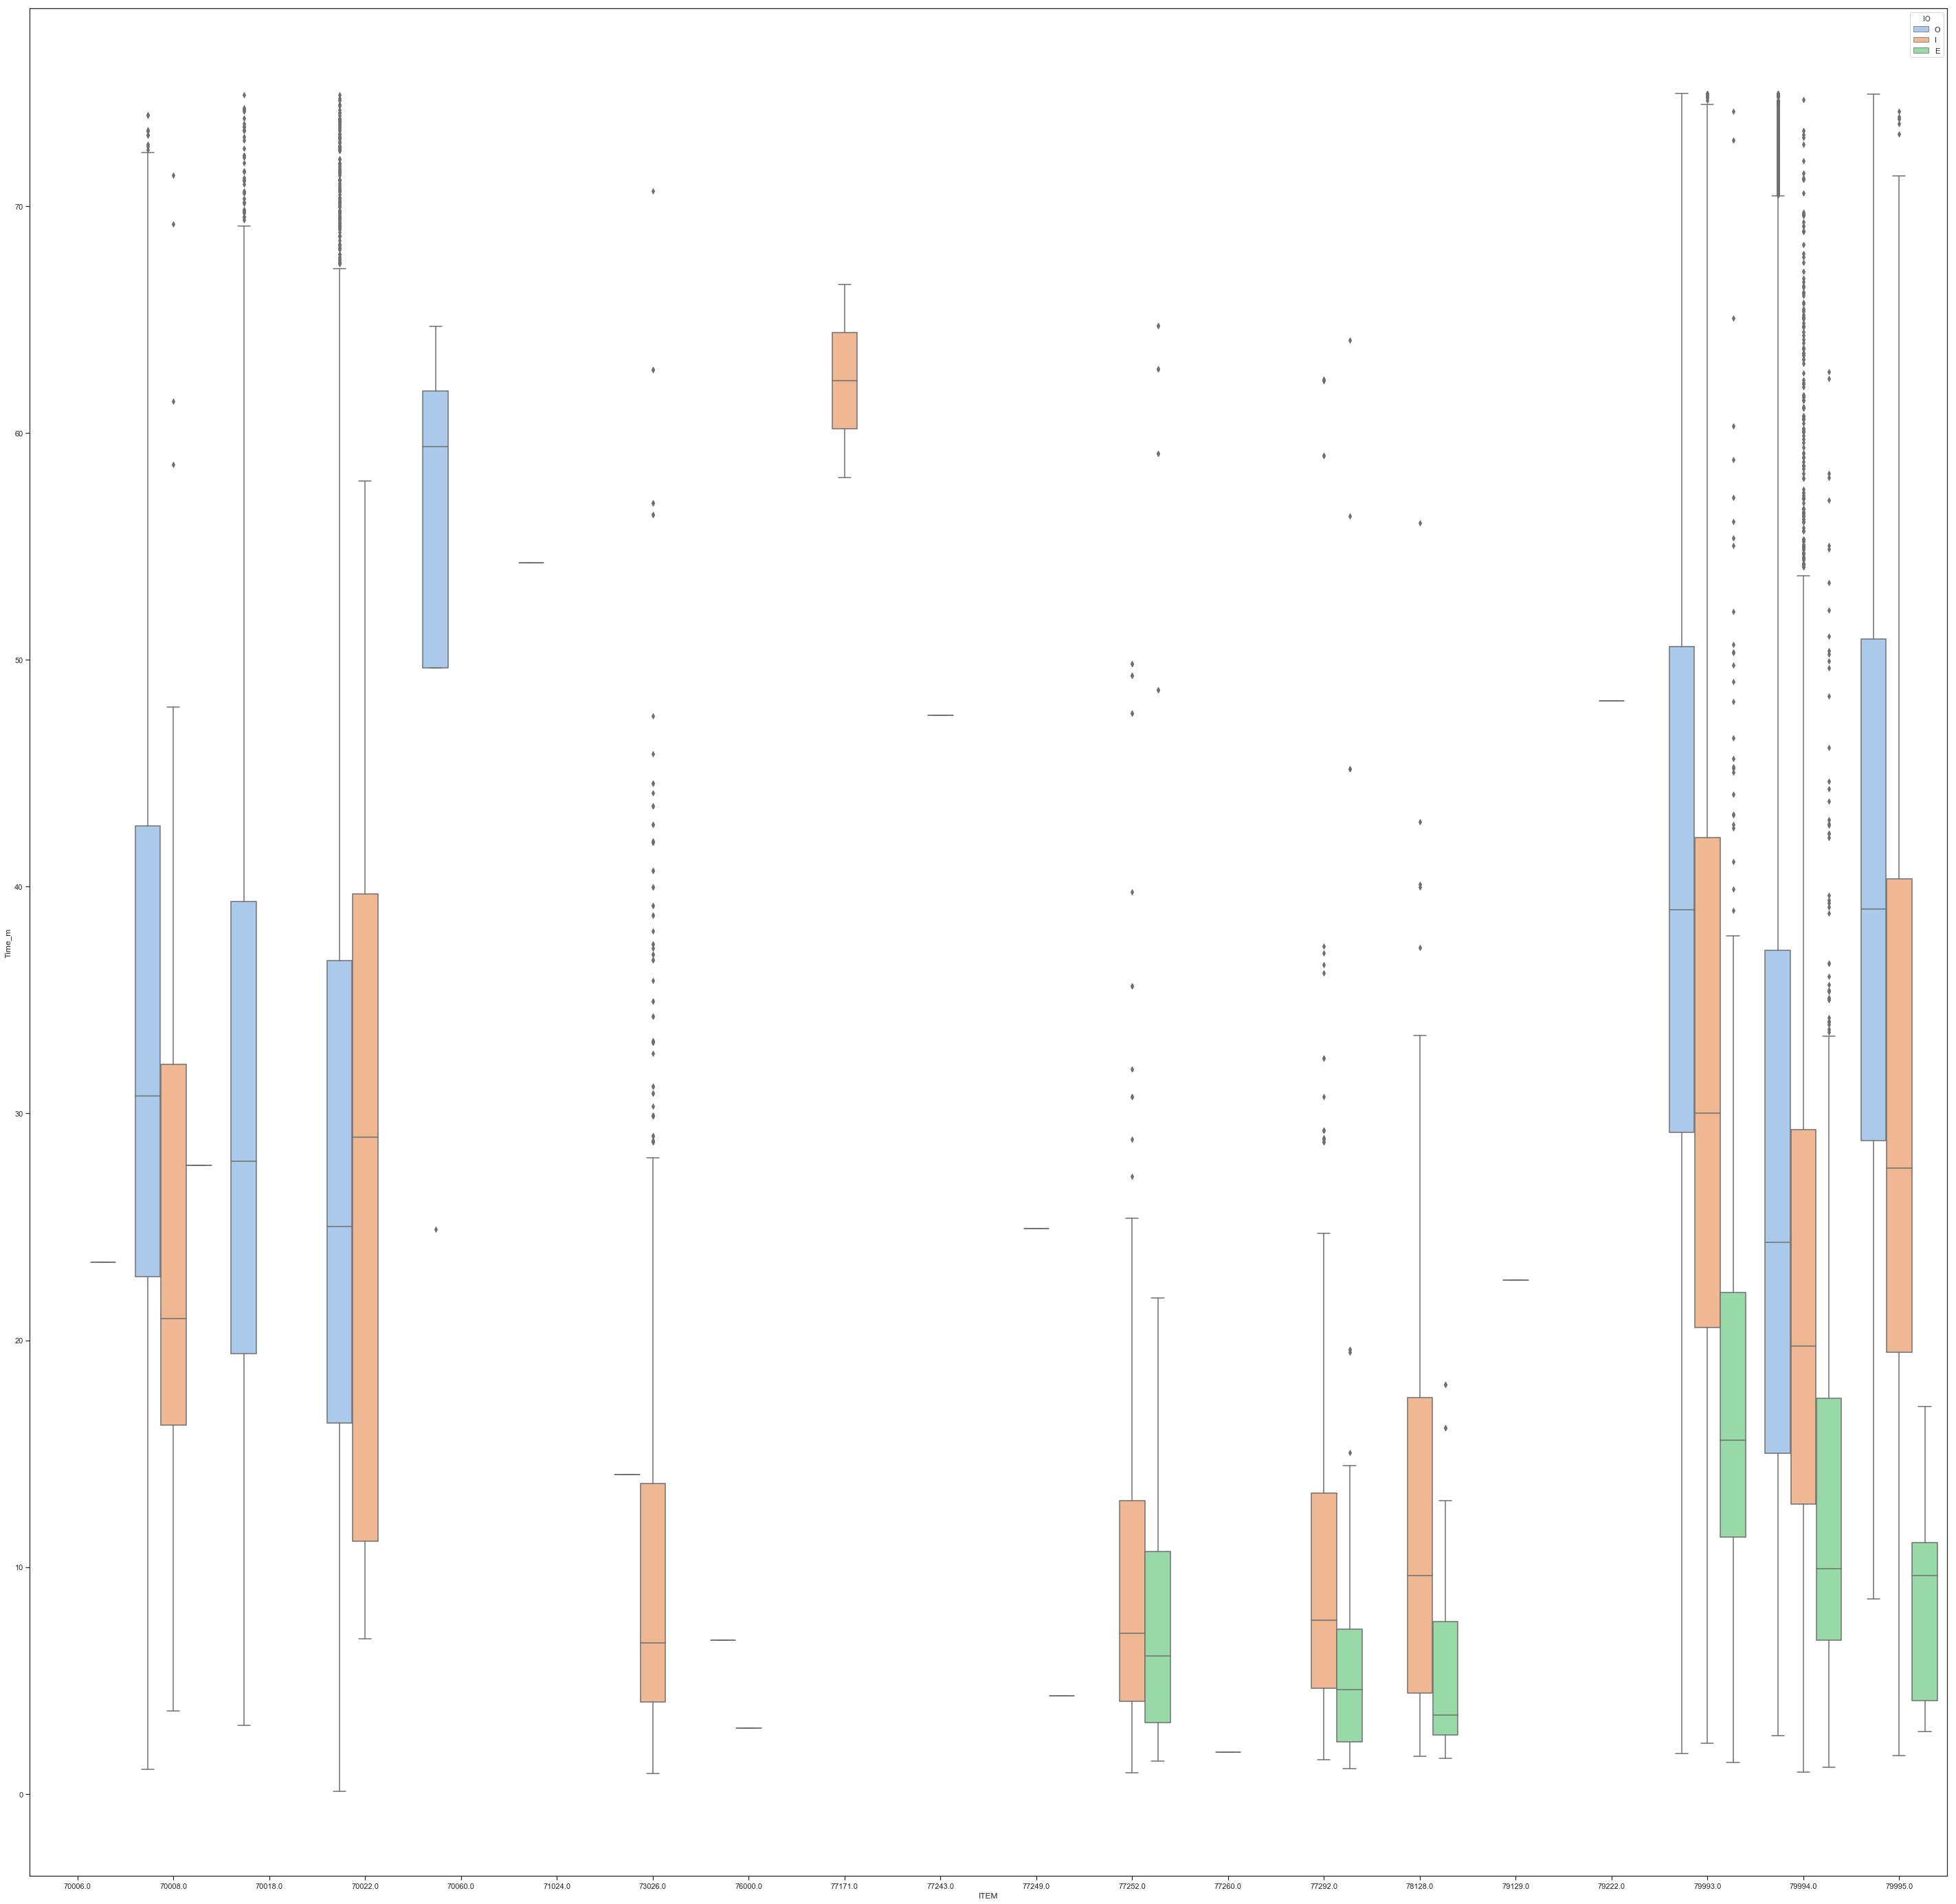

In [377]:
plt.figure(figsize=(50,50))
sns.boxplot(x="ITEM", y="Time_m",hue='IO',data=TS1, palette="pastel")

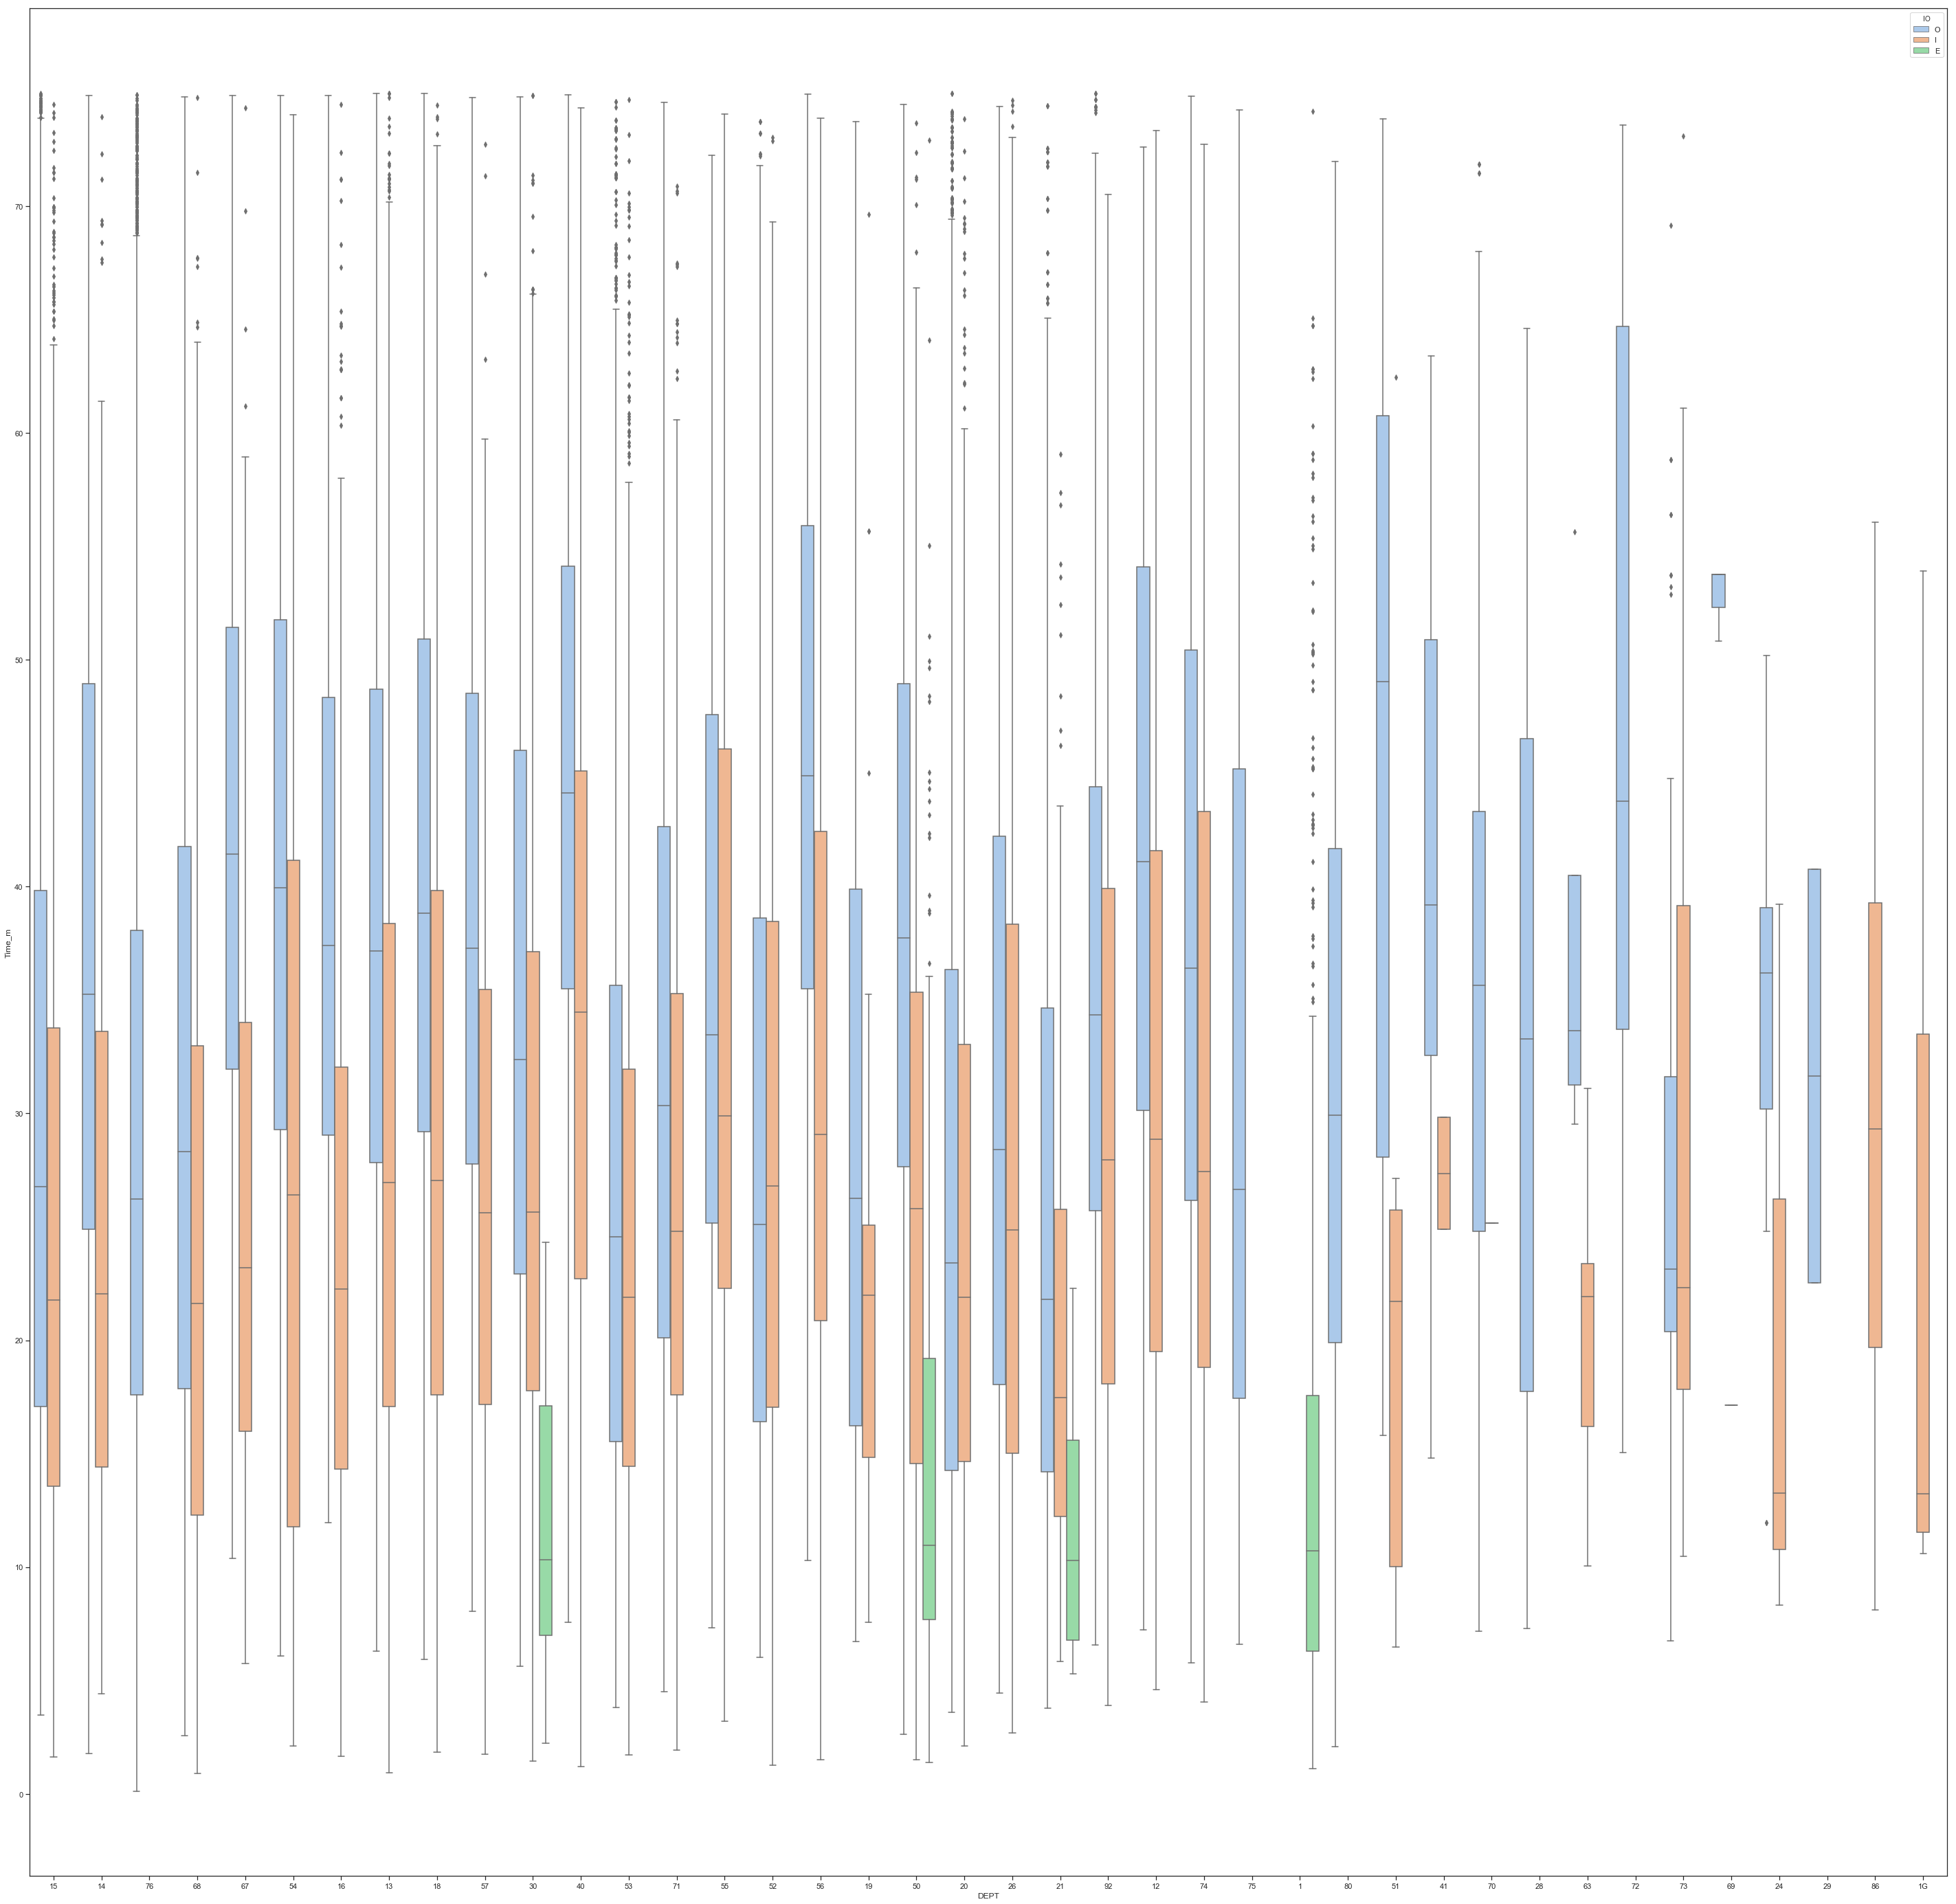

In [380]:
plt.figure(figsize=(50,50))
sns.boxplot(x="DEPT", y="Time_m",hue='IO',data=TS1, palette="pastel")

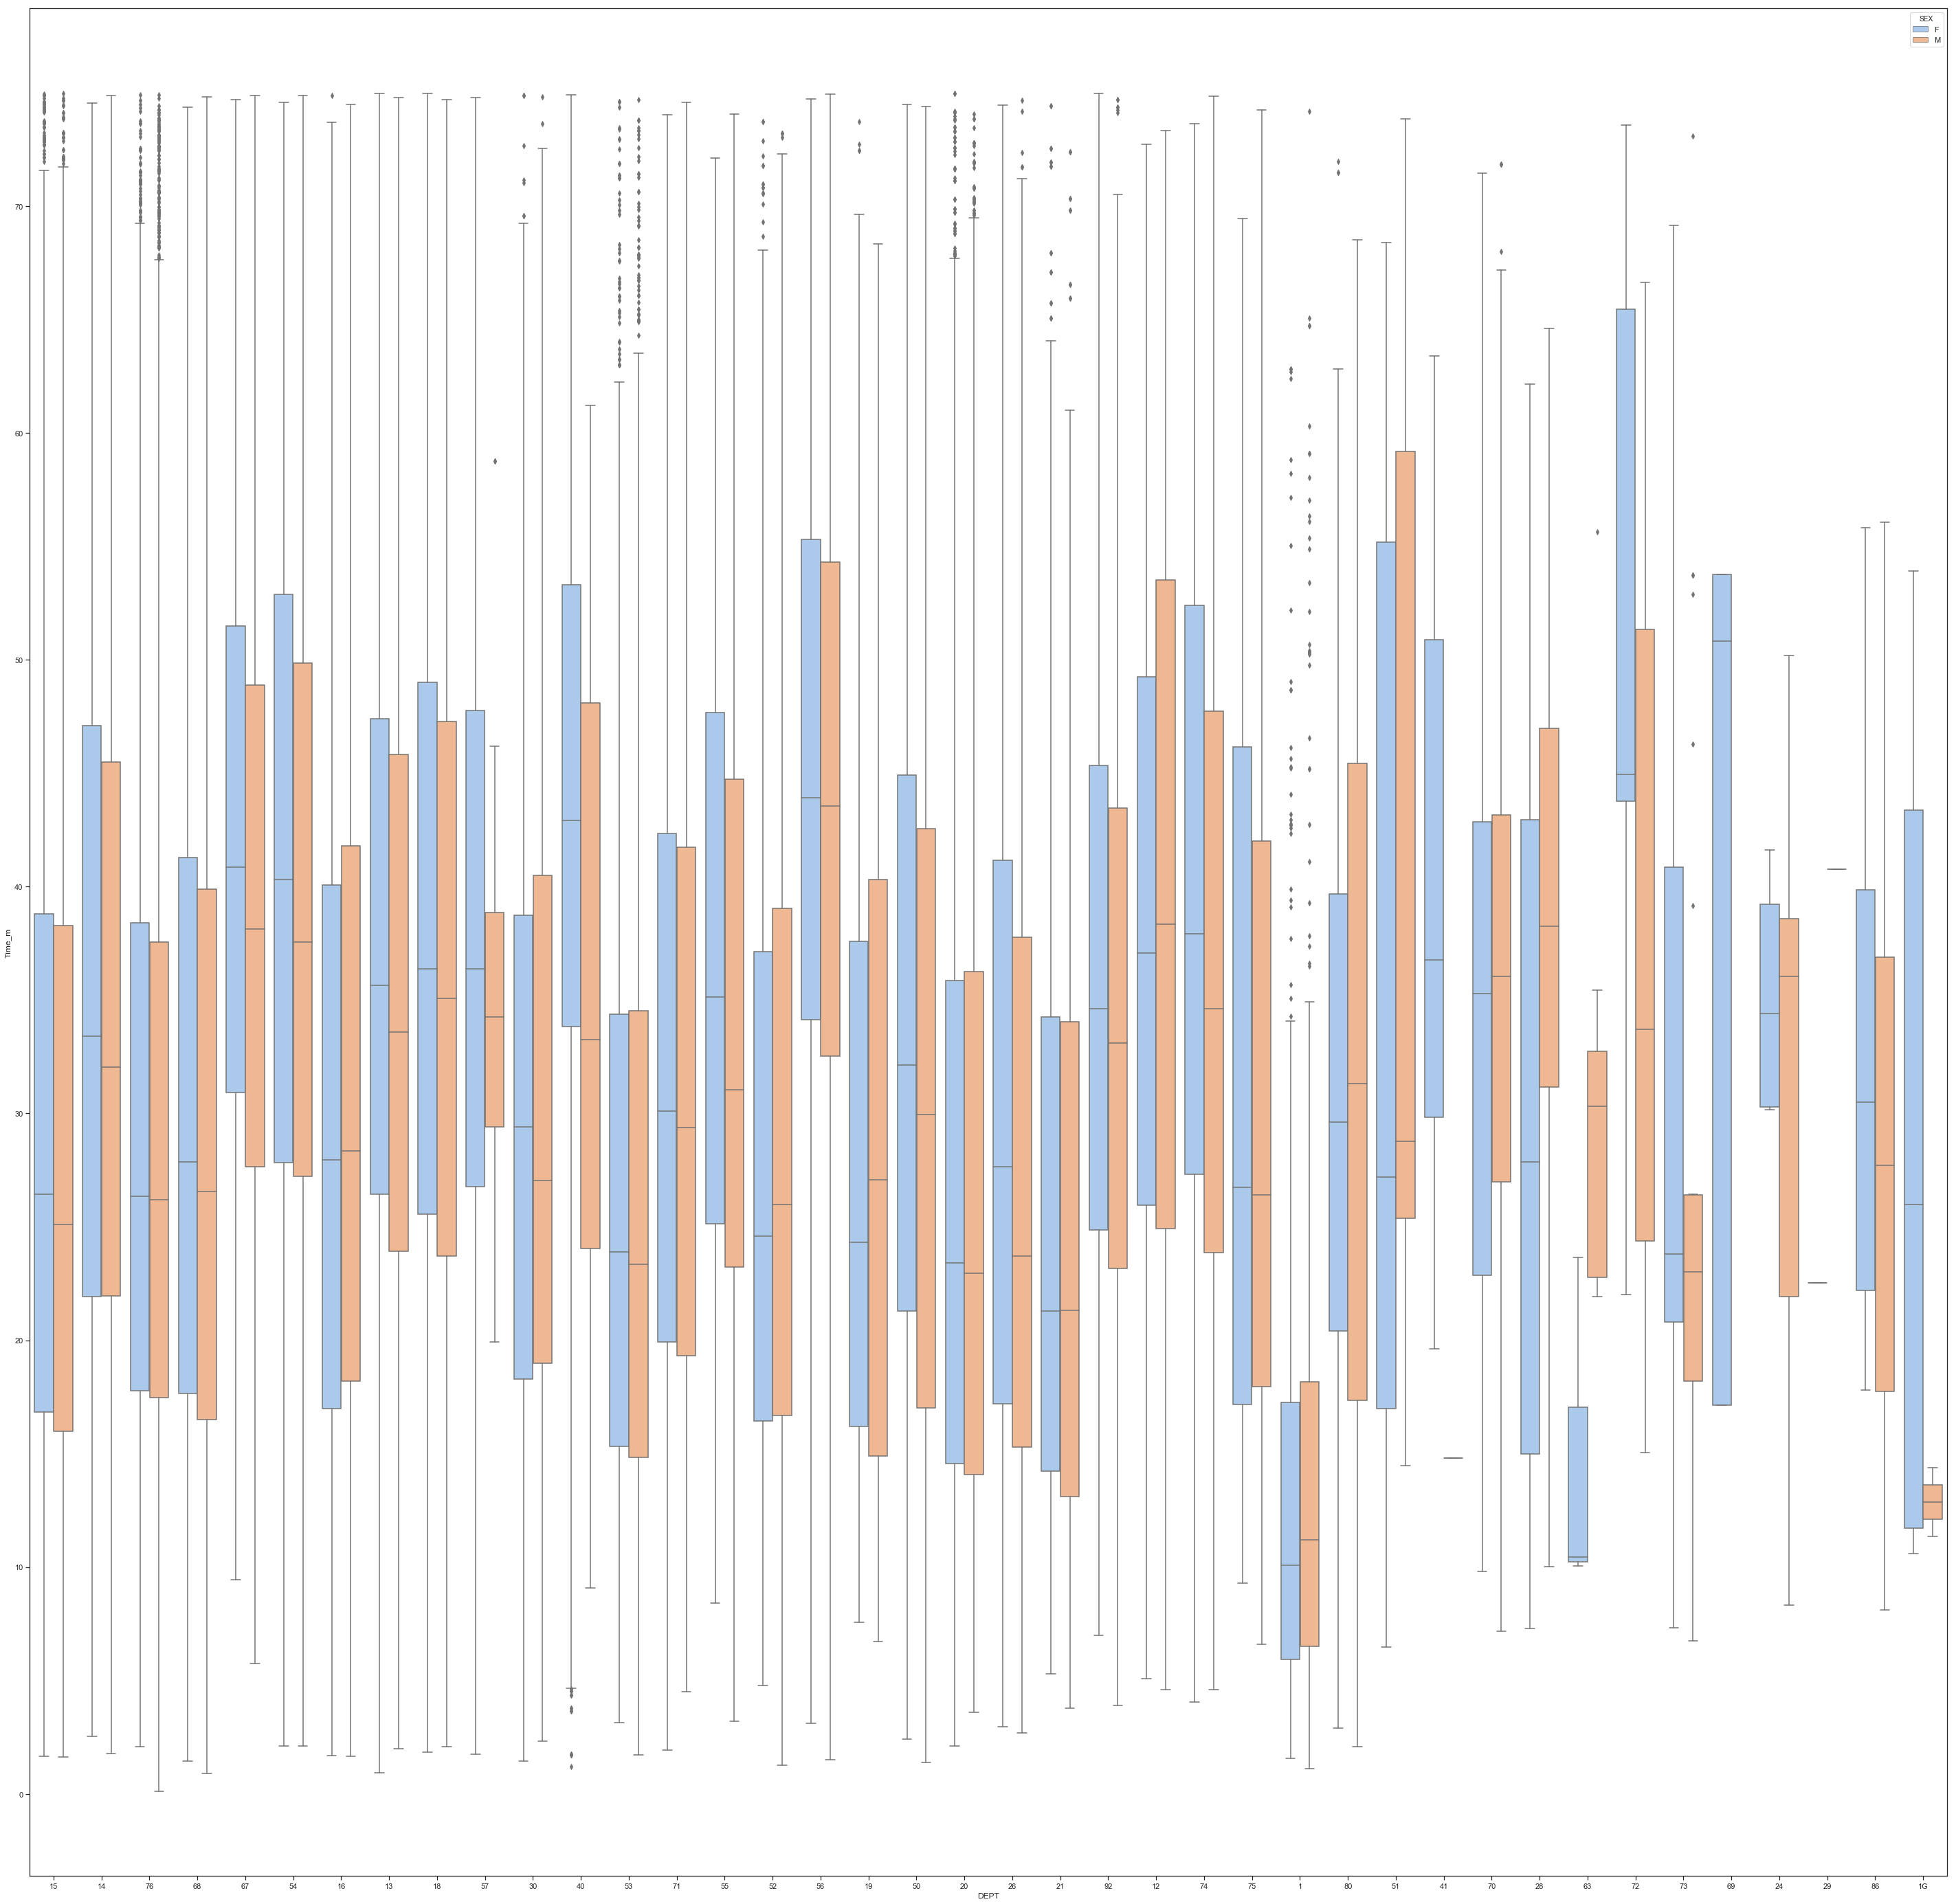

In [379]:
plt.figure(figsize=(50,50))
sns.boxplot(x="DEPT", y="Time_m",hue='SEX',data=TS1, palette="pastel")

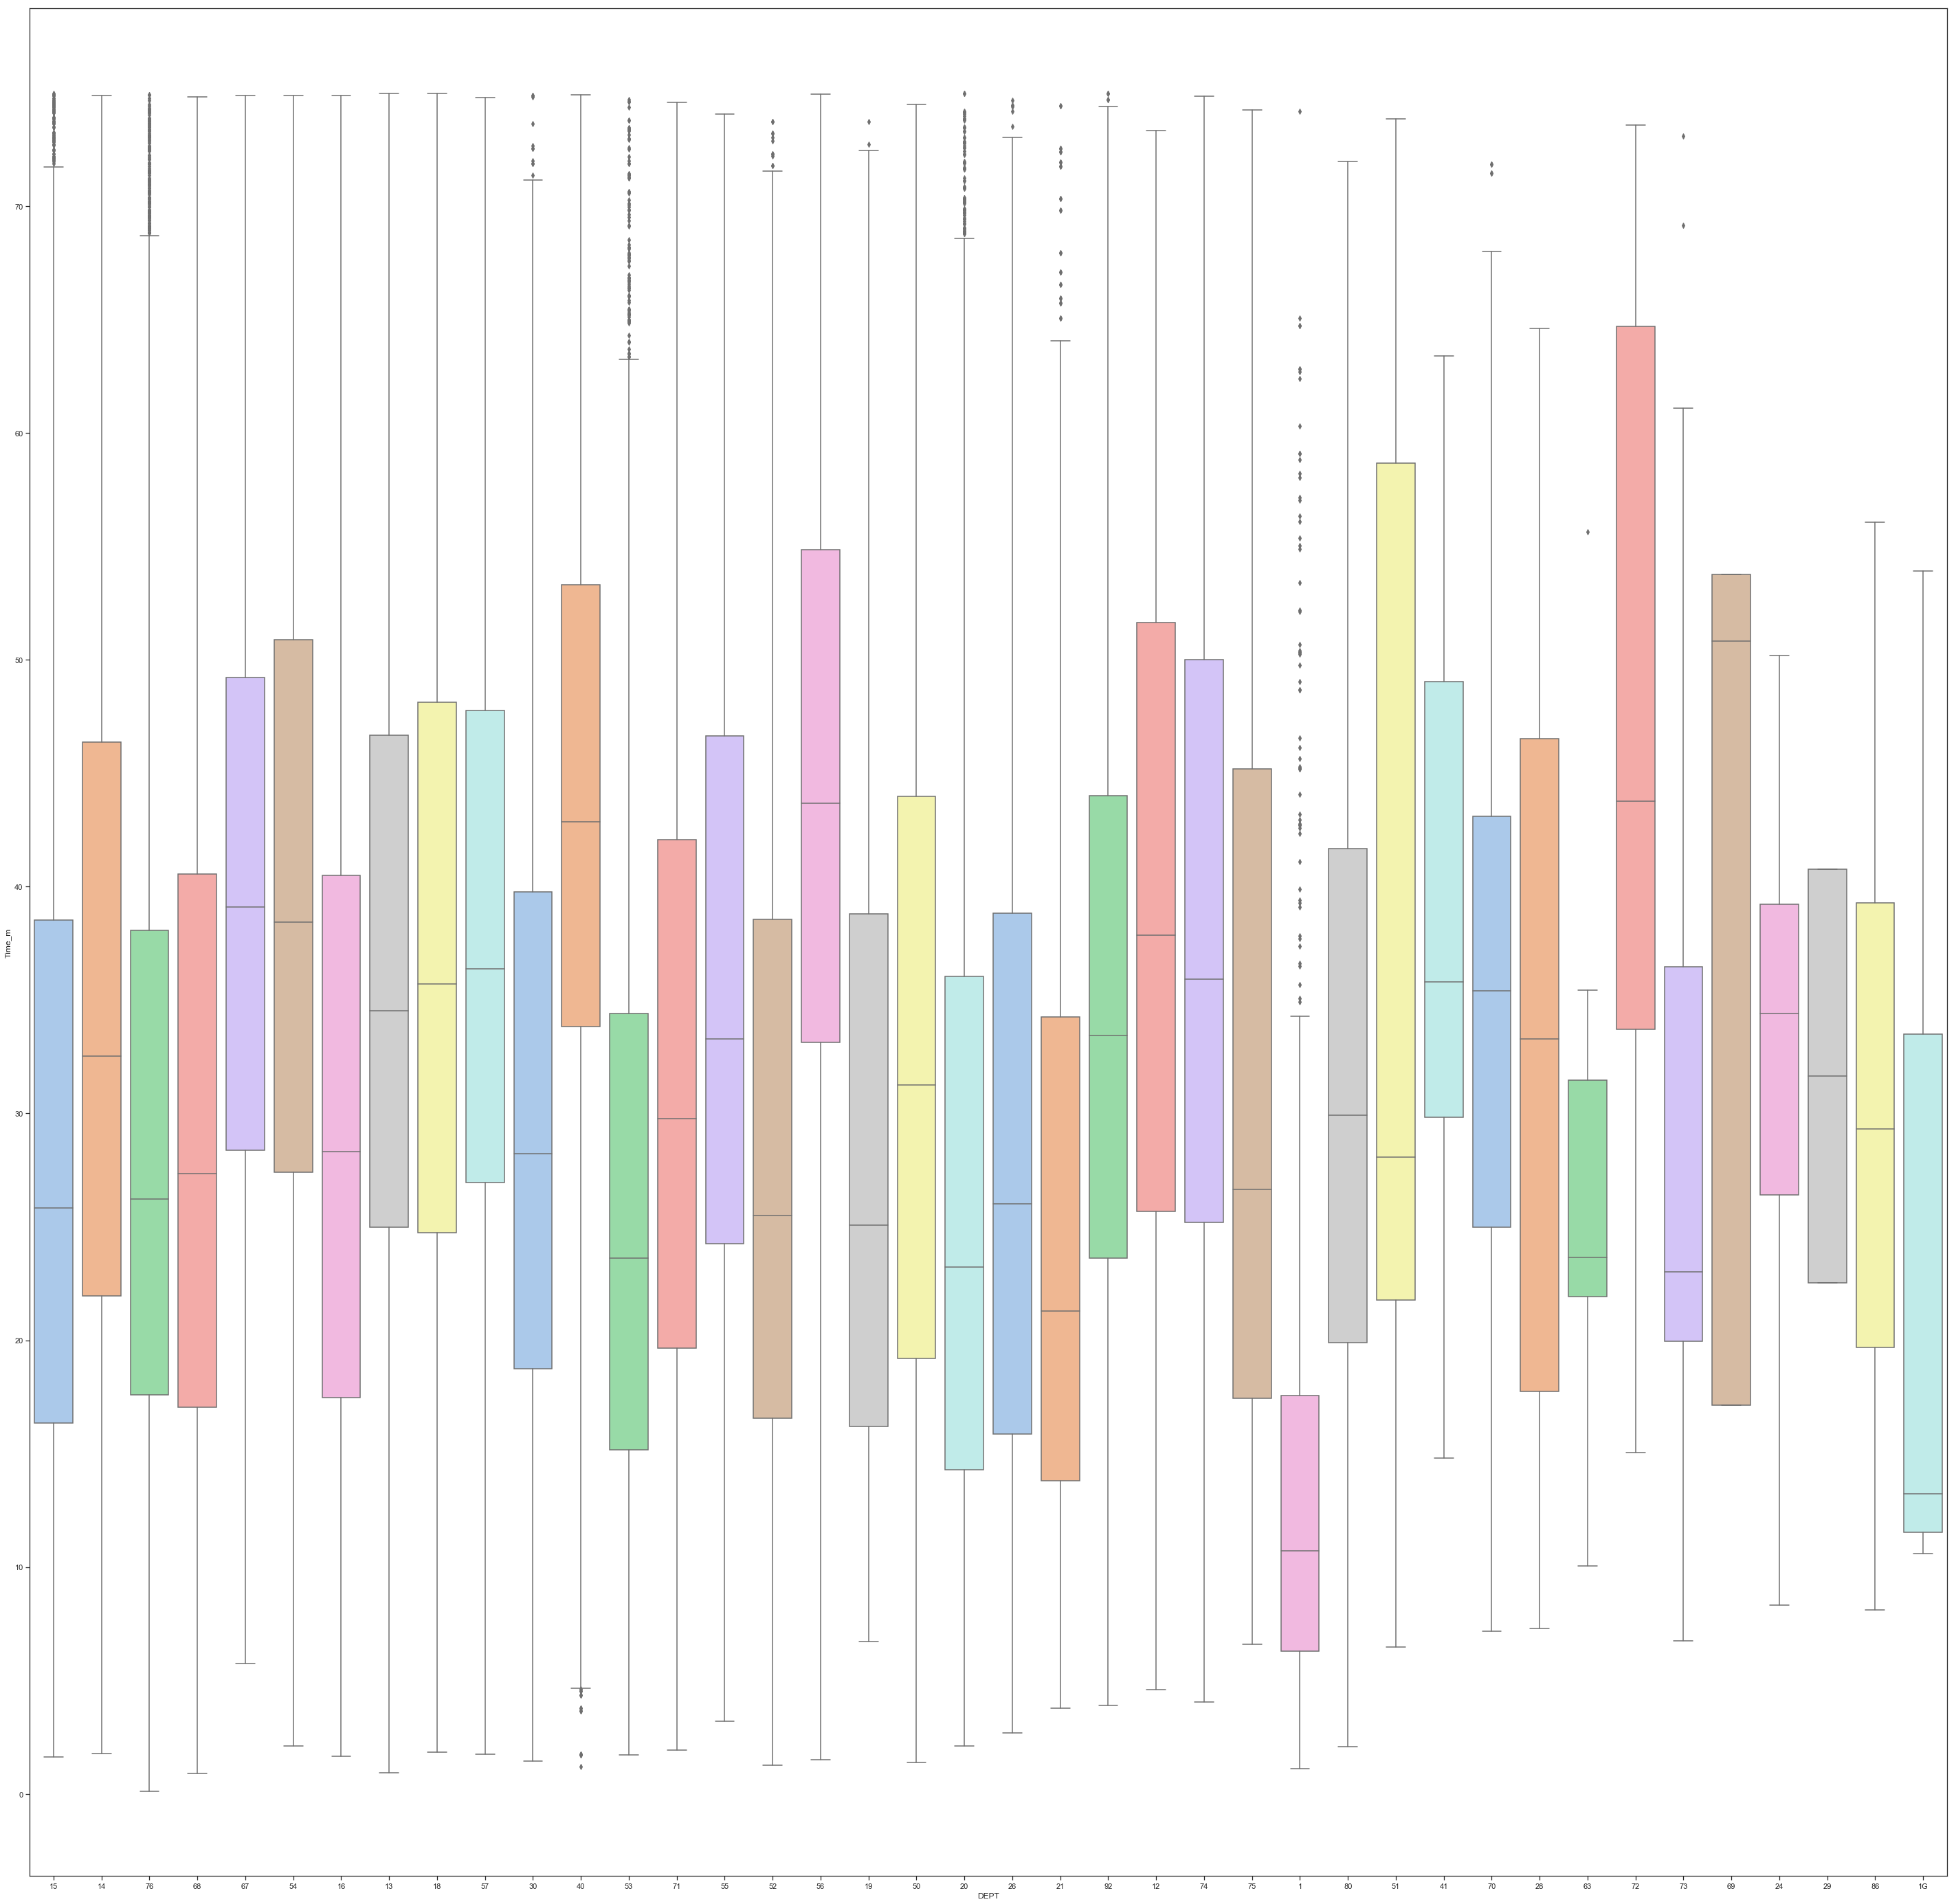

In [375]:
plt.figure(figsize=(50,50))
sns.boxplot(x="DEPT", y="Time_m",data=TS1, palette="pastel")

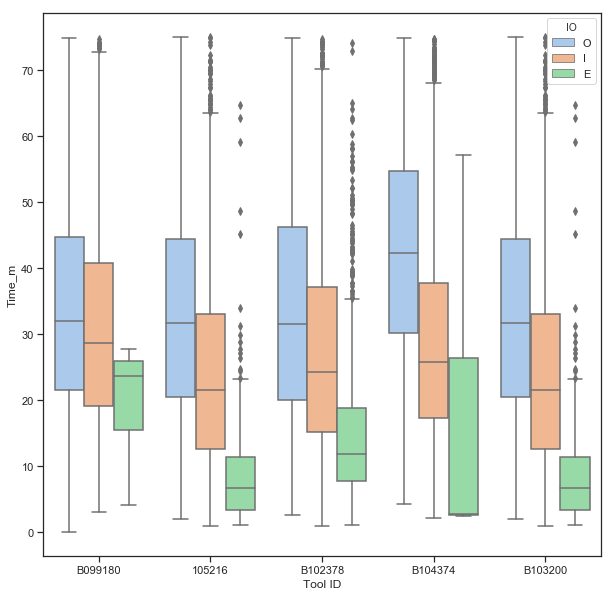

In [370]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Tool ID", y="Time_m",hue='IO',data=TS1, palette="pastel")

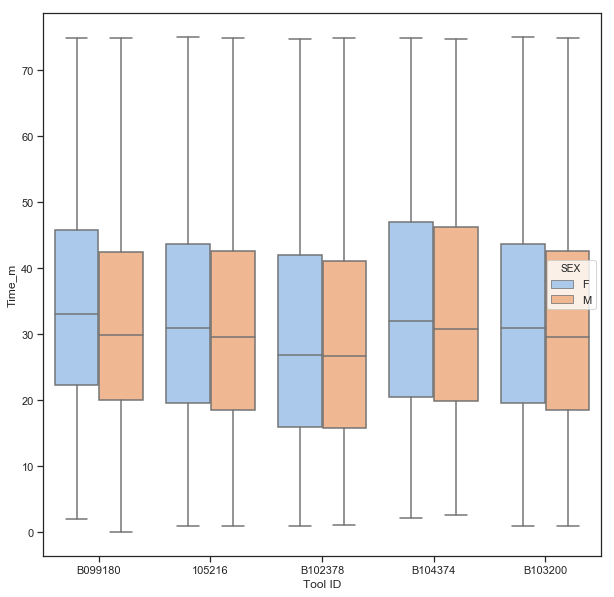

In [371]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Tool ID", y="Time_m",hue='SEX',data=TS1, palette="pastel")

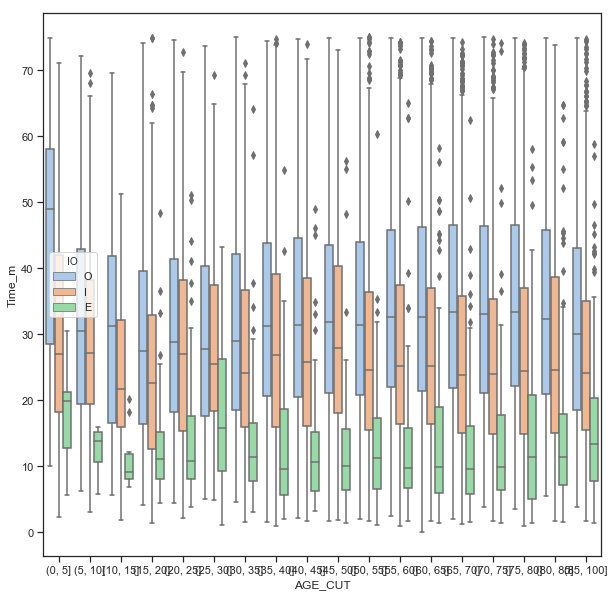

In [365]:
plt.figure(figsize=(10,10))
sns.boxplot(x="AGE_CUT", y="Time_m",hue='IO',data=TS1, palette="pastel")

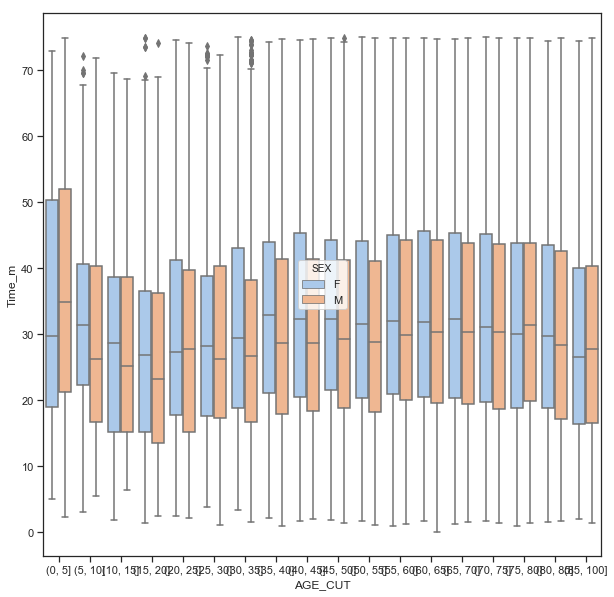

In [367]:
plt.figure(figsize=(10,10))
sns.boxplot(x="AGE_CUT", y="Time_m",hue='SEX',data=TS1, palette="pastel")

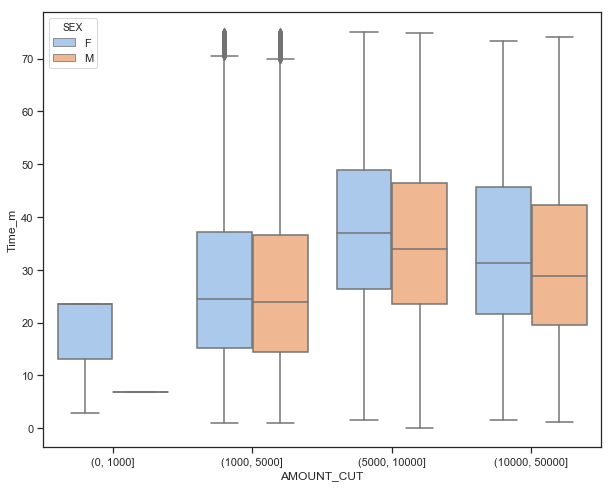

In [369]:
plt.figure(figsize=(10,8))
sns.boxplot(x="AMOUNT_CUT", y="Time_m",hue='SEX',data=TS1, palette="pastel")

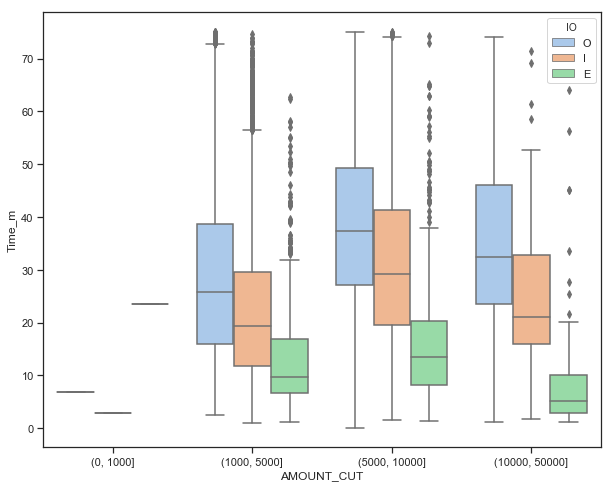

In [368]:
plt.figure(figsize=(10,8))
sns.boxplot(x="AMOUNT_CUT", y="Time_m",hue='IO',data=TS1, palette="pastel")

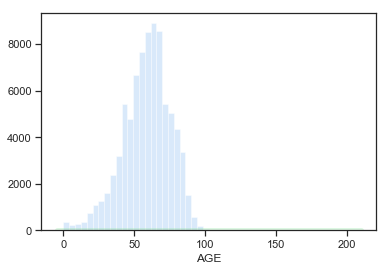

In [282]:
# Hist only
sns.distplot( a=TS1["AGE"], hist=True, kde=False, rug=False)

# To change parameters of density distribution
sns.distplot( a=TS1["AGE"], kde=True,kde_kws={"color": "g", "alpha":0.3, "linewidth": 5, "shade":True })
#sns.plt.show()



In [293]:
'''ax = TS1[TS1['AGE_CUT'],TS1['SEX']].plot(kind='bar', figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("01", fontsize=12)
ax.set_ylabel("02", fontsize=12)
plt.show()'''

'ax = TS1[TS1[\'AGE_CUT\'],TS1[\'SEX\']].plot(kind=\'bar\', figsize=(15, 10), legend=True, fontsize=12)\nax.set_xlabel("01", fontsize=12)\nax.set_ylabel("02", fontsize=12)\nplt.show()'

In [66]:
TS1.columns

Index(['CSDP', 'PNO', 'CDATE', 'ITEM', 'SEQNO', 'SCRN', 'BDATE', 'EDATE',
       'ORDERDR', 'MD_NO', 'PP_NO', 'MODEL_NAME', 'STATION_NAME', 'PLACE',
       'CASENO', 'LINKNO', 'AMOUNT', 'IO', 'DEPT', 'SEX', 'AGE', 'Tool ID',
       'Time', 'Time_m', 'Time_s', 'AGE_CUT', 'AMOUNT_CUT'],
      dtype='object')

In [62]:
TS1=TS1.drop(labels='SNO2',axis=1)

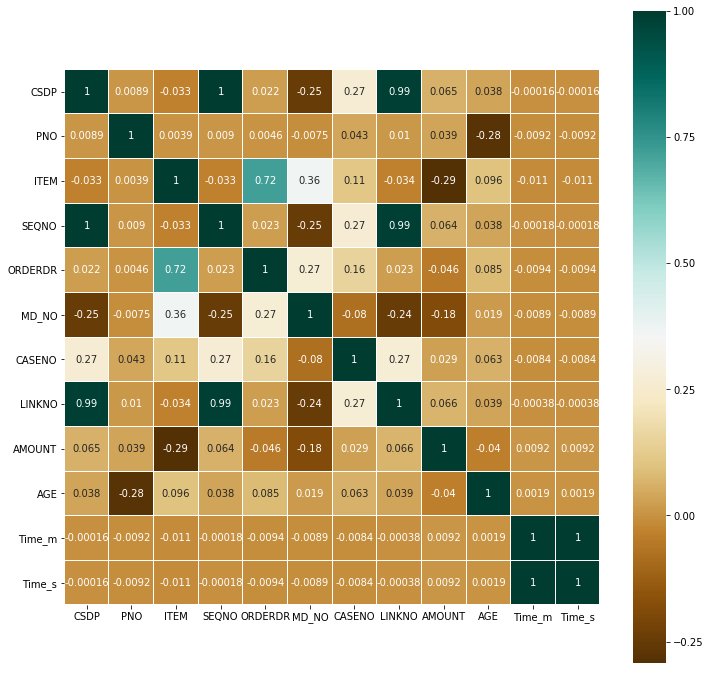

In [65]:
F

In [337]:
'''#flights = flights.pivot(index='month', columns='year',  values='passengers')
# print(flights)
plt.figure(figsize=(10,10))
ax = sns.heatmap(TS2, cmap = "BrBG",
linewidths=0.1, square=True, linecolor='white',
annot=True)'''



'#flights = flights.pivot(index=\'month\', columns=\'year\',  values=\'passengers\')\n# print(flights)\nplt.figure(figsize=(10,10))\nax = sns.heatmap(TS2, cmap = "BrBG",\nlinewidths=0.1, square=True, linecolor=\'white\',\nannot=True)'